# Create and print data frame for all results

In [2]:

import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

# Assign path
path = '../Stuff/effiency_rates_cristina'  # path to files
files = glob.glob(path + "/*.csv")
file_count = len(files)

# Create empty list to store dataframes
dataframes_list = []
file_labels = []  # List to store modified file labels

# Append datasets to the list and print corresponding file names and information
for i in range(file_count):
    temp_df = pd.read_csv(files[i])
    temp_df.columns = ['dist_min_Mpc', 'dist_max_Mpc', 'metric', 'found', 'total', 'efficiency']
    dataframes_list.append(temp_df['efficiency'])

    # Get the modified file name for labeling
    file_name = os.path.basename(files[i])
    modified_file_name = file_name.replace("efficiency_", "").replace("_cadence", "").replace(".csv", "")
    file_labels.append(modified_file_name)

    print("File Name:", modified_file_name)  # Print the file name
    print(temp_df)  # Print the dataframe content
    print("-" * 40)  # Print a separator line

E = np.array(dataframes_list, dtype=object)
X = np.arange(7)

File Name: rolling_ns3_rw0.9_v2.0_10yrs
   dist_min_Mpc  dist_max_Mpc                              metric  found  \
0            10           600     KNePopMetric__blue_color_detect   2369   
1            10           600    KNePopMetric__multi_color_detect  21672   
2            10           600          KNePopMetric__multi_detect  24581   
3            10           600      KNePopMetric__red_color_detect   3990   
4            10           600        KNePopMetric__ztfrest_simple   4711   
5            10           600   KNePopMetric__ztfrest_simple_blue   2728   
6            10           600    KNePopMetric__ztfrest_simple_red   2667   

    total  efficiency  
0  500000    0.004738  
1  500000    0.043344  
2  500000    0.049162  
3  500000    0.007980  
4  500000    0.009422  
5  500000    0.005456  
6  500000    0.005334  
----------------------------------------
File Name: rolling_ns3_rw0.5_v2.0_10yrs
   dist_min_Mpc  dist_max_Mpc                              metric  found  \
0 

File Name: good_seeing_u_gsw0.0_v2.1_10yrs
   dist_min_Mpc  dist_max_Mpc                              metric  found  \
0            10           600     KNePopMetric__blue_color_detect   2119   
1            10           600    KNePopMetric__multi_color_detect  23415   
2            10           600          KNePopMetric__multi_detect  26653   
3            10           600      KNePopMetric__red_color_detect   3853   
4            10           600        KNePopMetric__ztfrest_simple   4503   
5            10           600   KNePopMetric__ztfrest_simple_blue   2563   
6            10           600    KNePopMetric__ztfrest_simple_red   2470   

    total  efficiency  
0  500000    0.004238  
1  500000    0.046830  
2  500000    0.053306  
3  500000    0.007706  
4  500000    0.009006  
5  500000    0.005126  
6  500000    0.004940  
----------------------------------------
File Name: good_seeing_gsw50.0_v2.1_10yrs
   dist_min_Mpc  dist_max_Mpc                              metric  found 

In [3]:
f = E[17]
print(f)
len(E)


[0.004464 0.048844 0.054852 0.00817 0.009012 0.005186 0.00499]


27

In [7]:
a = dataframes_list[1]
print(a)

0    0.003940
1    0.047144
2    0.053582
3    0.007084
4    0.008330
5    0.004848
6    0.004394
Name: efficiency, dtype: float64


In [9]:
f = E[18]
print(f)
len(E)


[0.00443 0.045932 0.052246 0.007122 0.008254 0.004748 0.00433]


27

# Print results in order

In [10]:
import os
import pandas as pd
import numpy as np
import glob

# Assign path
path = '../Stuff/effiency_rates_cristina'  # path to files
files = glob.glob(path + "/*.csv")
file_count = len(files)

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['File Name', 'Highest Efficiency for ztfrest_simple'])

# Process each file
for i in range(file_count):
    temp_df = pd.read_csv(files[i])
    temp_df.columns = ['dist_min_Mpc', 'dist_max_Mpc', 'metric', 'found', 'total', 'efficiency']
    
    # Filter rows where metric is 'ztfrest_simple'
    ztfrest_df = temp_df[temp_df['metric'].str.contains('ztfrest_simple')]
    
    if not ztfrest_df.empty:
        # Find the highest efficiency value for 'ztfrest_simple'
        highest_efficiency = ztfrest_df['efficiency'].max()
        
        # Get the modified file name for labeling
        file_name = os.path.basename(files[i])
        modified_file_name = file_name.replace("efficiency_", "").replace("_cadence", "").replace(".csv", "")
        
        # Append the result to the DataFrame
        results_df = results_df.append({
            'File Name': modified_file_name,
            'Highest Efficiency for ztfrest_simple': highest_efficiency
        }, ignore_index=True)

# Sort the results DataFrame by 'Highest Efficiency for ztfrest_simple' in descending order
results_df_sorted = results_df.sort_values(by='Highest Efficiency for ztfrest_simple', ascending=False)

# Print the sorted results DataFrame
print(results_df_sorted)

# Save the sorted results to a CSV file
output_file = '../Stuff/sorted_results.csv'
results_df_sorted.to_csv(output_file, index=False)


                           File Name  Highest Efficiency for ztfrest_simple
26               baseline_v3.4_10yrs                               0.010880
23               baseline_v3.0_10yrs                               0.010712
5           presto_gap4.0_v2.0_10yrs                               0.010482
25               baseline_v3.3_10yrs                               0.010406
6           presto_gap3.5_v2.0_10yrs                               0.010150
14  good_seeing_u_gsw50.0_v2.1_10yrs                               0.009596
7           presto_gap3.0_v2.0_10yrs                               0.009500
0       rolling_ns3_rw0.9_v2.0_10yrs                               0.009422
20               baseline_v2.1_10yrs                               0.009190
16    good_seeing_gsw50.0_v2.1_10yrs                               0.009148
17     good_seeing_gsw0.0_v2.1_10yrs                               0.009012
15   good_seeing_u_gsw0.0_v2.1_10yrs                               0.009006
2       roll

# Print Table for remaining cadences 11-27

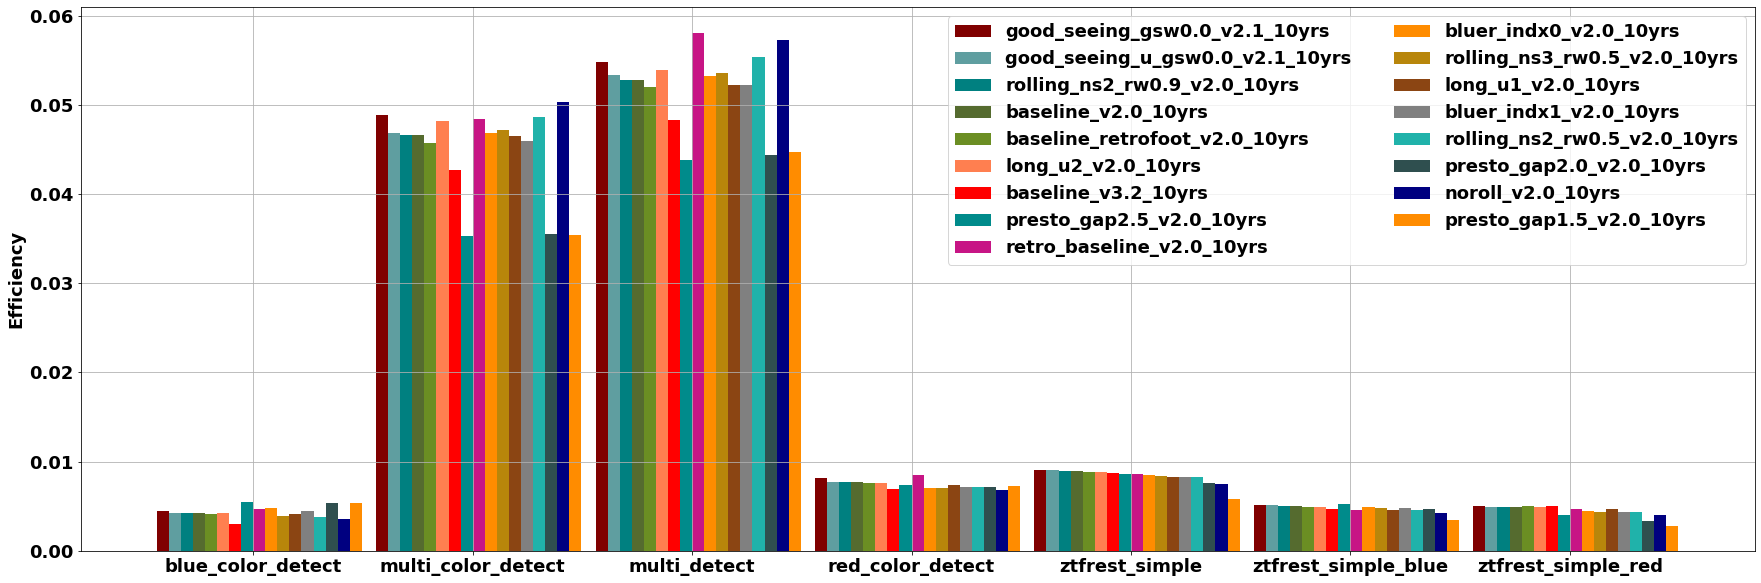

In [10]:
import matplotlib
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 18}
matplotlib.rc('font', **font)

w = 0.055  # width of each bar
n_bars = 10  # total number of bars per group

plt.figure(figsize=(30, 10))
plt.bar(X + 0, E[17], label='good_seeing_gsw0.0_v2.1_10yrs', color='maroon', width=w)
plt.bar(X + w, E[15], label='good_seeing_u_gsw0.0_v2.1_10yrs ', color='cadetblue', width=w)
plt.bar(X + 2*w, E[2], label='rolling_ns2_rw0.9_v2.0_10yrs', color='teal', width=w)
plt.bar(X + 3*w, E[21], label='baseline_v2.0_10yrs', color='darkolivegreen', width=w)
plt.bar(X + 4*w, E[22], label='baseline_retrofoot_v2.0_10yrs', color='olivedrab', width=w)
plt.bar(X + 5*w, E[12], label='long_u2_v2.0_10yrs', color='coral', width=w)
plt.bar(X + 6*w, E[24], label='baseline_v3.2_10yrs', color='red', width=w)
plt.bar(X + 7*w, E[8], label='presto_gap2.5_v2.0_10yrs', color='darkcyan', width=w)
plt.bar(X + 8*w, E[4], label='retro_baseline_v2.0_10yrs', color='mediumvioletred', width=w)
plt.bar(X + 9*w, E[19], label='bluer_indx0_v2.0_10yrs', color='darkorange', width=w)
plt.bar(X + 10*w, E[1], label='rolling_ns3_rw0.5_v2.0_10yrs', color='darkgoldenrod', width=w)
plt.bar(X + 11*w, E[13], label='long_u1_v2.0_10yrs', color='saddlebrown', width=w)
plt.bar(X + 12*w, E[18], label='bluer_indx1_v2.0_10yrs', color='grey', width=w)
plt.bar(X + 13*w, E[3], label='rolling_ns2_rw0.5_v2.0_10yrs', color='lightseagreen', width=w)
plt.bar(X + 14*w, E[9], label='presto_gap2.0_v2.0_10yrs', color='darkslategray', width=w)
plt.bar(X + 15*w, E[11], label='noroll_v2.0_10yrs', color='navy', width=w)
plt.bar(X + 16*w, E[10], label='presto_gap1.5_v2.0_10yrs', color='darkorange', width=w)

# plot
kneMetrics = ['blue_color_detect', 'multi_color_detect', 'multi_detect', 'red_color_detect', 'ztfrest_simple', 'ztfrest_simple_blue', 'ztfrest_simple_red']
plt.grid()
plt.xticks(X + (n_bars + 5) * w / 2, kneMetrics, fontweight='bold')
plt.ylabel('Efficiency', fontweight='bold')

plt.legend(loc="upper right", fontsize='18', ncol=2)
plt.savefig('fig4_3.4+newnewnew+2024.png')
plt.savefig('fig4_3.4+newnewnew+2024.pdf', bbox_inches="tight", format='pdf')  # Save as PDF

plt.show()


# Selected Cadences

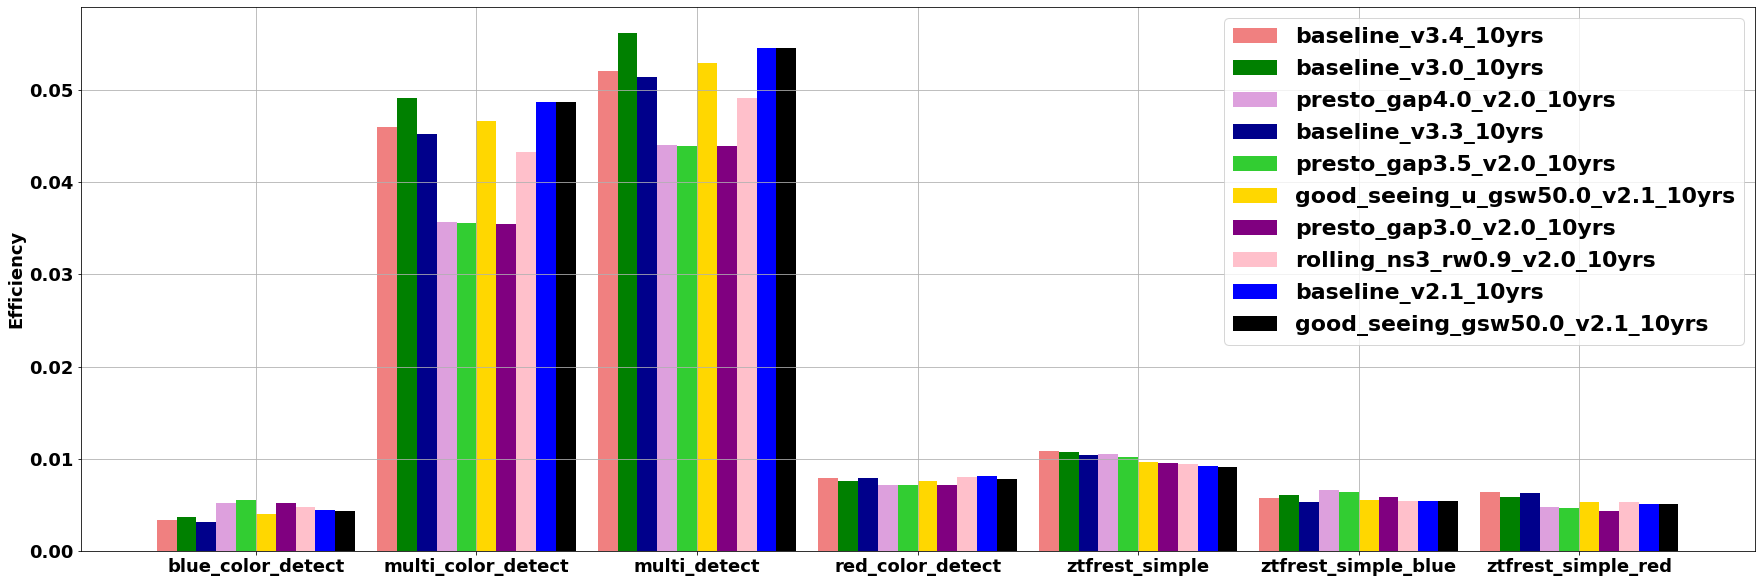

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and E are defined somewhere before this code block
font = {'family': 'normal', 'weight': 'bold', 'size': 18}
matplotlib.rc('font', **font)

w = 0.09  # width of each bar
n_bars = 10  # total number of bars per group

plt.figure(figsize=(30, 10))

# Plot bars
plt.bar(X + 0*w, E[26], label='baseline_v3.4_10yrs', color='lightcoral', width=w)
plt.bar(X + 1*w, E[23], label='baseline_v3.0_10yrs', color='green', width=w)
plt.bar(X + 3*w, E[5], label='presto_gap4.0_v2.0_10yrs', color='plum', width=w)
plt.bar(X + 2*w, E[25], label='baseline_v3.3_10yrs', color='darkblue', width=w)
plt.bar(X + 4*w, E[6], label='presto_gap3.5_v2.0_10yrs', color='limegreen', width=w)
plt.bar(X + 5*w, E[14], label='good_seeing_u_gsw50.0_v2.1_10yrs', color='gold', width=w)
plt.bar(X + 6*w, E[7], label='presto_gap3.0_v2.0_10yrs', color='purple', width=w)
plt.bar(X + 7*w, E[0], label='rolling_ns3_rw0.9_v2.0_10yrs', color='pink', width=w)
plt.bar(X + 8*w, E[20], label='baseline_v2.1_10yrs', color='blue', width=w)
plt.bar(X + 9*w, E[16], label='good_seeing_gsw50.0_v2.1_10yrs', color='black', width=w)

# plot
kneMetrics = ['blue_color_detect', 'multi_color_detect', 'multi_detect', 'red_color_detect', 
              'ztfrest_simple', 'ztfrest_simple_blue', 'ztfrest_simple_red']

# Center the xticks
plt.grid()
plt.xticks(X + (n_bars - 1) * w / 2, kneMetrics, fontweight='bold')
plt.ylabel('Efficiency', fontweight='bold')

plt.legend(loc="upper right", fontsize='22', ncol=1)
plt.savefig('top10_fig4_3.4+newnewnew+2024.png')
plt.savefig('top10_fig4_3.4+newnewnew+2024.pdf', bbox_inches="tight", format='pdf')  # Save as PDF

plt.show()



### Table to get percentages: 

In [8]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

# Assign path
path = '../Stuff/effiency_rates_cristina'  # path to files
files = glob.glob(path + "/*.csv")
file_count = len(files)

# Create empty list to store dataframes
dataframes_list = []
file_labels = []  # List to store modified file labels

# Append datasets to the list and print corresponding file names and information
for i in range(file_count):
    temp_df = pd.read_csv(files[i])
    temp_df.columns = ['dist_min_Mpc', 'dist_max_Mpc', 'metric', 'found', 'total', 'efficiency']
    dataframes_list.append(temp_df[['metric', 'efficiency']])  # Selecting only 'metric' and 'efficiency' columns

    # Get the modified file name for labeling
    file_name = os.path.basename(files[i])
    modified_file_name = file_name.replace("efficiency_", "").replace("_cadence", "").replace(".csv", "")
    file_labels.append(modified_file_name)

    print("File Name:", modified_file_name)  # Print the file name
    print(temp_df[['metric', 'efficiency']])  # Print only 'metric' and 'efficiency' columns
    print("-" * 40)  # Print a separator line

# Multiply efficiency by 100 to get percentage format
for df in dataframes_list:
    df['efficiency'] *= 100

# Combine dataframes into a single dataframe
combined_df = pd.concat(dataframes_list)

print("\nTable showing efficiency in percentage format and metric:")
print(combined_df)



File Name: rolling_ns3_rw0.9_v2.0_10yrs
                               metric  efficiency
0     KNePopMetric__blue_color_detect    0.004738
1    KNePopMetric__multi_color_detect    0.043344
2          KNePopMetric__multi_detect    0.049162
3      KNePopMetric__red_color_detect    0.007980
4        KNePopMetric__ztfrest_simple    0.009422
5   KNePopMetric__ztfrest_simple_blue    0.005456
6    KNePopMetric__ztfrest_simple_red    0.005334
----------------------------------------
File Name: rolling_ns3_rw0.5_v2.0_10yrs
                               metric  efficiency
0     KNePopMetric__blue_color_detect    0.003940
1    KNePopMetric__multi_color_detect    0.047144
2          KNePopMetric__multi_detect    0.053582
3      KNePopMetric__red_color_detect    0.007084
4        KNePopMetric__ztfrest_simple    0.008330
5   KNePopMetric__ztfrest_simple_blue    0.004848
6    KNePopMetric__ztfrest_simple_red    0.004394
----------------------------------------
File Name: rolling_ns2_rw0.9_v2.0_10yr

<ipython-input-8-6f7d0c48e41b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['efficiency'] *= 100


In [19]:
def calculate_percent_difference(file1_name, file2_name):
    # Find index of file names in file_labels list
    try:
        index1 = file_labels.index(file1_name)
        index2 = file_labels.index(file2_name)
    except ValueError:
        print("One or both file names not found.")
        return

    # Get efficiency arrays for the specified files and convert to numerical values
    efficiencies1 = dataframes_list[index1]['efficiency'].astype(float)
    efficiencies2 = dataframes_list[index2]['efficiency'].astype(float)

    # Calculate percent difference
    percent_difference = ((efficiencies2 - efficiencies1) / efficiencies1) * 100

    # Return percent difference
    return percent_difference

# Example usage:
file1_name = "baseline_v2.0_10yrs"
file2_name = "retro_baseline_v2.0_10yrs"
percent_diff = calculate_percent_difference(file1_name, file2_name)
print("Percent Difference between '{}' and '{}':".format(file1_name, file2_name))
print(percent_diff)






Percent Difference between 'baseline_v2.0_10yrs' and 'retro_baseline_v2.0_10yrs':
0    11.100659
1     3.868422
2     9.849718
3    10.626137
4    -4.721604
5    -9.447558
6    -4.918699
Name: efficiency, dtype: float64


In [18]:
def calculate_percent_difference_baseline(file1_name):
    # Find index of file names in file_labels list
    try:
        index1 = file_labels.index(file1_name)
    except ValueError:
        print(f"'{file1_name}' not found.")
        return

    # Get efficiency array for the specified baseline file and convert to numerical values
    baseline_efficiencies = dataframes_list[index1]['efficiency'].astype(float)

    percent_differences = {}

    # Calculate percent difference between baseline and each other cadence
    for file2_name in file_labels:
        if file2_name != file1_name:  # Exclude self-comparison
            # Find index of the other file name in file_labels list
            index2 = file_labels.index(file2_name)

            # Get efficiency array for the other cadence file and convert to numerical values
            other_efficiencies = dataframes_list[index2]['efficiency'].astype(float)

            # Calculate percent difference
            percent_difference = ((other_efficiencies - baseline_efficiencies) / baseline_efficiencies) * 100

            # Store percent difference in dictionary
            percent_differences[file2_name] = percent_difference

    return percent_differences

# Example usage:
baseline_file_name = "baseline_v2.0_10yrs"
percent_diffs = calculate_percent_difference_baseline(baseline_file_name)
print("Percent Differences between '{}' and other cadences:".format(baseline_file_name))
for cadence, percent_diff in percent_diffs.items():
    print(f"{cadence}:")
    print(percent_diff)
    print("-" * 40)


Percent Differences between 'baseline_v2.0_10yrs' and other cadences:
rolling_ns3_rw0.9_v2.0_10yrs:
0    11.429915
1    -7.054938
2    -6.950070
3     3.663289
4     4.922049
5     9.207366
6     8.414634
Name: efficiency, dtype: float64
----------------------------------------
rolling_ns3_rw0.5_v2.0_10yrs:
0    -7.337723
1     1.093623
2     1.415755
3    -7.976098
4    -7.238307
5    -2.962370
6   -10.691057
Name: efficiency, dtype: float64
----------------------------------------
rolling_ns2_rw0.9_v2.0_10yrs:
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: efficiency, dtype: float64
----------------------------------------
rolling_ns2_rw0.5_v2.0_10yrs:
0   -11.523989
1     4.305871
2     4.875648
3    -6.599117
4    -8.129176
5    -7.806245
6   -10.772358
Name: efficiency, dtype: float64
----------------------------------------
retro_baseline_v2.0_10yrs:
0    11.100659
1     3.868422
2     9.849718
3    10.626137
4    -4.721604
5    -9.447558
6    -4.918699
Name

# PRINT OUT TABLE,TABLE 2/3 IN PAPER

In [24]:
import os
import pandas as pd
import glob

# Assign path
path = '../Stuff/effiency_rates_cristina'  # path to files
files = glob.glob(path + "/*.csv")
file_count = len(files)

# Create empty dataframe to store the results
result_df = pd.DataFrame()

# Process each file and collect efficiency values
for i in range(file_count):
    temp_df = pd.read_csv(files[i])
    temp_df.columns = ['dist_min_Mpc', 'dist_max_Mpc', 'metric', 'found', 'total', 'efficiency']

    # Get the modified file name for labeling
    file_name = os.path.basename(files[i]).replace(".csv", "")

    # Set the index of the temp_df to be the metric, then transpose
    temp_df.set_index('metric', inplace=True)
    transposed_df = temp_df[['efficiency']].T
    
    # Set the index (row label) of the transposed_df to be the file name
    transposed_df.index = [file_name]
    
    # Append the transposed_df to the result_df
    result_df = pd.concat([result_df, transposed_df])

# Save the result to a CSV file
result_df.to_csv('TABLE_ALL.csv')

print(f"Efficiency table saved to TABLE_ALL.csv")


Efficiency table saved to TABLE_ALL.csv


In [21]:
import pandas as pd
import re

# Load the CSV file
df = pd.read_csv('TABLE_ALL.csv')

# Function to escape underscores and remove unwanted words in LaTeX
def format_name(name):
    # Remove 'efficiency' and 'cadence' from file names, and 'KNePopMetric' from metric names
    formatted_name = name.replace('efficiency_', '').replace('_cadence', '').replace('KNePopMetric__', '')
    # Replace underscores with \_
    formatted_name = formatted_name.replace('_', r'\_')
    return formatted_name.strip()

# Get column names
columns = df.columns

# Split column names into two lists
ztfrest_columns = [col for col in columns if 'ztfrest_' in col]
other_columns = [col for col in columns if 'ztfrest_' not in col and col != 'Unnamed: 0']

# Create new DataFrames based on these columns
df_ztfrest = df[['Unnamed: 0'] + ztfrest_columns]
df_other = df[['Unnamed: 0'] + other_columns]

# Function to create LaTeX table from DataFrame
def df_to_latex(df, table_caption):
    # Start LaTeX table
    latex_table = (
        "\\begin{table}[h!]\n"
        "    \\centering\n"
        "    \\begin{tabular}{" + "|l|" * len(df.columns) + "}\n"
        "    \\hline\n"
    )
    
    # Create the header row, formatting column names
    header_row = " & ".join(["\\textbf{" + format_name(col) + "}" for col in df.columns])
    latex_table += header_row + " \\\\ \\hline\n"
    
    # Add each row from the DataFrame to the LaTeX table
    for index, row in df.iterrows():
        row_data = " & ".join([format_name(str(cell)) for cell in row])
        latex_table += row_data + " \\\\ \\hline\n"
    
    # End LaTeX table
    latex_table += (
        "    \\end{tabular}\n"
        "    \\caption{" + table_caption + "}\n"
        "\\end{table}"
    )
    
    return latex_table

# Create LaTeX tables
latex_table_ztfrest = df_to_latex(df_ztfrest, "Metrics with 'ztfrest_' in the name.")
latex_table_other = df_to_latex(df_other, "Metrics without 'ztfrest_' in the name.")

# Print the LaTeX tables
print("Table with 'ztfrest_' metrics:")
print(latex_table_ztfrest)

print("\nTable with other metrics:")
print(latex_table_other)


Table with 'ztfrest_' metrics:
\begin{table}[h!]
    \centering
    \begin{tabular}{|l||l||l||l|}
    \hline
\textbf{Unnamed: 0} & \textbf{ztfrest\_simple} & \textbf{ztfrest\_simple\_blue} & \textbf{ztfrest\_simple\_red} \\ \hline
rolling\_ns3\_rw0.9\_v2.0\_10yrs & 0.009422 & 0.005456 & 0.005334 \\ \hline
rolling\_ns3\_rw0.5\_v2.0\_10yrs & 0.00833 & 0.004848 & 0.004394 \\ \hline
rolling\_ns2\_rw0.9\_v2.0\_10yrs & 0.00898 & 0.004996 & 0.00492 \\ \hline
rolling\_ns2\_rw0.5\_v2.0\_10yrs & 0.00825 & 0.004606 & 0.00439 \\ \hline
retro\_baseline\_v2.0\_10yrs & 0.008556 & 0.004524 & 0.004678 \\ \hline
presto\_gap4.0\_v2.0\_10yrs & 0.010482 & 0.006552 & 0.004784 \\ \hline
presto\_gap3.5\_v2.0\_10yrs & 0.01015 & 0.006342 & 0.004604 \\ \hline
presto\_gap3.0\_v2.0\_10yrs & 0.0095 & 0.005818 & 0.00435 \\ \hline
presto\_gap2.5\_v2.0\_10yrs & 0.008612 & 0.005232 & 0.003982 \\ \hline
presto\_gap2.0\_v2.0\_10yrs & 0.007548 & 0.004646 & 0.003344 \\ \hline
presto\_gap1.5\_v2.0\_10yrs & 0.005826 & 0.0034